# **Unir Dataframes en Python usando Pandas**

Vamos a aprender diversas formas en las que se pueden fusionar múltiples DataFrames en Python usando la biblioteca Pandas:
- Concatenar DataFrames a lo largo de filas y columnas.
- Fusionar DataFrames en keys específicas mediante diferentes lógicas de unión como unión izquierda, derecha, interna y externa.
- Unir DataFrames por índice.

## **Concatenar**

Para concatenar los DataFrames a lo largo de la fila, puede usar la función concat() en pandas. Tendrás que pasar los nombres de los DataFrames en una lista como argumento a la función concat(): 

`df_row = pd.concat([df1, df2])` 

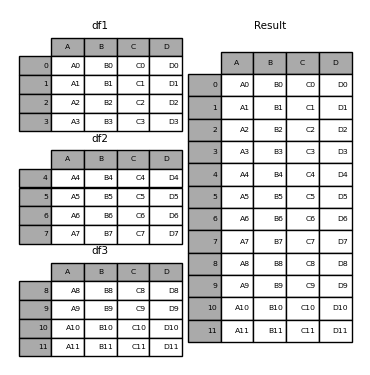

Probemos con un ejercicio. En la ruta './data/interm/Población/' tiene información de la población departamental para los años 2019, 2020, 2021, 2022. Concatene todas las bases de datos en una sola y renómbrela como poblacion_peru.

In [145]:
# Verificamos que hemos importado Pandas
import pandas as pd

In [146]:
# Lectura de las bases de datos:
poblacion_2019 = pd.read_stata("../data/interm/Población/Poblacion_Peru_2019.dta")
poblacion_2020 = pd.read_stata("../data/interm/Población/Poblacion_Peru_2020.dta")
poblacion_2021 = pd.read_stata("../data/interm/Población/Poblacion_Peru_2021.dta")
poblacion_2022 = pd.read_stata("../data/interm/Población/Poblacion_Peru_2022.dta")


In [147]:
# Concatene y cree un nuevo df:
poblacion_peru = pd.concat([poblacion_2019, poblacion_2020, poblacion_2021, poblacion_2022])


In [148]:
poblacion_peru['departamento'].value_counts()

departamento
AMAZONAS         16
LAMBAYEQUE       16
TUMBES           16
TACNA            16
SAN MARTIN       16
PUNO             16
PIURA            16
PASCO            16
MOQUEGUA         16
MADRE DE DIOS    16
LORETO           16
LIMA             16
LA LIBERTAD      16
ANCASH           16
JUNIN            16
ICA              16
HUANUCO          16
HUANCAVELICA     16
CUSCO            16
CALLAO           16
CAJAMARCA        16
AYACUCHO         16
AREQUIPA         16
APURIMAC         16
UCAYALI          16
Name: count, dtype: int64

In [149]:
# Muestre el resultado:
poblacion_peru.columns


Index(['departamento', 'poblacion', 'anio', 'mes'], dtype='object')

Puede observar que los dos df ahora están concatenados en un solo DataFrame a lo largo de la fila. Puede ajustar el índice con el argumento ignore_index como True al llamar a la función concat():

`df_row_reindex = pd.concat([df1, df2], ignore_index=True)`

In [150]:
# Desarrolle acá lo propuesto
poblacion_peru = pd.concat([poblacion_2019, poblacion_2020, poblacion_2021, poblacion_2022], ignore_index=True)

In [151]:
poblacion_peru

,departamento,poblacion,anio,mes
0,AMAZONAS,427041,2019,1
1,AMAZONAS,427041,2019,2
2,AMAZONAS,427041,2019,3
3,AMAZONAS,427041,2019,4
4,ANCASH,1171756,2019,1
...,...,...,...,...
395,TUMBES,259554,2022,4
396,UCAYALI,615608,2022,1
397,UCAYALI,615608,2022,2
398,UCAYALI,615608,2022,3


Para concatenar DataFrames a lo largo de la columna, puede especificar el parámetro del axis como 1:

`df_col = pd.concat([df1,df2], axis=1)`

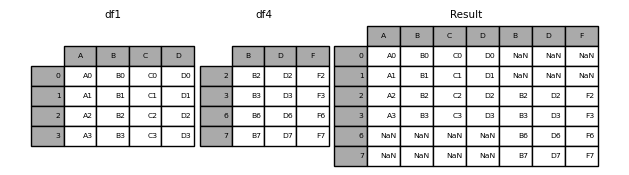

In [152]:
# Pruebe concatenando los dataframes anteriores aquí:
df_col = pd.concat([poblacion_2019, poblacion_2020], axis=1)


In [153]:
df_col

,departamento,poblacion,anio,mes,departamento,poblacion,anio,mes
0,AMAZONAS,427041,2019,1,AMAZONAS,426806,2020,1
1,AMAZONAS,427041,2019,2,AMAZONAS,426806,2020,2
2,AMAZONAS,427041,2019,3,AMAZONAS,426806,2020,3
3,AMAZONAS,427041,2019,4,AMAZONAS,426806,2020,4
4,ANCASH,1171756,2019,1,ANCASH,1180638,2020,1
...,...,...,...,...,...,...,...,...
95,TUMBES,248877,2019,4,TUMBES,251521,2020,4
96,UCAYALI,518190,2019,1,UCAYALI,589110,2020,1
97,UCAYALI,518190,2019,2,UCAYALI,589110,2020,2
98,UCAYALI,518190,2019,3,UCAYALI,589110,2020,3


Practiquemos un poco más: en la dirección './data/interm/Enaho/' tiene bases de datos para tasa de pobreza, informalidad y ruralidad por año. En cada caso concatene las bases de datos según sea conveniente.

In [154]:
# Desarrolle su resultado en este espacio:
rural_2019 = pd.read_stata("../data/interm/Enaho/ENAHO-RURALIDAD-2019.dta")
rural_2020 = pd.read_stata("../data/interm/Enaho/ENAHO-RURALIDAD-2020.dta")


/var/folders/vs/qlfbg44n4pgb4vrf9xy6hqyw0000gn/T/ipykernel_18757/938014937.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  rural_2019 = pd.read_stata("../data/interm/Enaho/ENAHO-RURALIDAD-2019.dta")


In [155]:
rural_19_20 = pd.concat([rural_2019, rural_2020])

In [156]:
rural_19_20

,anio,mes,departamento,estrato,todos,tasa_ruralidad
0,2019,1,AMAZONAS,199.0,383.0,51.958225
1,2019,2,AMAZONAS,212.0,388.0,54.639175
2,2019,3,AMAZONAS,200.0,401.0,49.875313
3,2019,4,AMAZONAS,204.0,383.0,53.263706
4,2019,1,ANCASH,168.0,449.0,37.416481
...,...,...,...,...,...,...
95,2020,4,TUMBES,35.0,263.0,13.307984
96,2020,1,UCAYALI,113.0,367.0,30.790192
97,2020,2,UCAYALI,180.0,502.0,35.856575
98,2020,3,UCAYALI,119.0,426.0,27.934273


## **Merge**

Otra operación omnipresente relacionada con DataFrames es la operación de fusión. Dos DataFrames pueden contener diferentes tipos de información sobre la misma entidad y estar vinculados por alguna característica/columna común. Para unir estos DataFrames, pandas proporciona múltiples funciones como concat(), merge(), join(), etc. En esta sección se practicará el uso de la función merge() de pandas.

La sintaxis es la siguiente:

`df_merge_col = pd.merge(df_1, df_2, on='id')`

Anteriormente, habíamos trabajado con una base de datos que contenía información del PBI y la población de los países del mundo. Trabajemos uniendo estas dos bases a través de un merge en el nombre de los países.

In [157]:
import pandas as pd

In [158]:
# Desarrolle su ejercicio en este espacio
# Lea los datos en la carpeta raw
pbi = pd.read_excel("../data/raw/pbi_paises.xlsx")
poblacion = pd.read_excel("../data/raw/poblacion_paises.xlsx")


In [159]:
display(pbi.head())
display(poblacion.head())


,Country Name,Country Code,Indicator Name,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,PIB (UMN a precios constantes),5.055000e+09,5.162000e+09,5.445000e+09,5.731290e+09,5.767686e+09,4.695525e+09,5.501864e+09,NaN
1,Afganistán,AFG,PIB (UMN a precios constantes),1.195886e+12,1.222917e+12,1.255288e+12,1.270216e+12,1.319902e+12,1.288869e+12,1.022073e+12,NaN
2,Angola,AGO,PIB (UMN a precios constantes),1.623961e+12,1.582061e+12,1.579733e+12,1.558938e+12,1.547990e+12,1.460711e+12,1.478228e+12,1.523246e+12
3,Albania,ALB,PIB (UMN a precios constantes),1.354642e+12,1.399548e+12,1.452768e+12,1.511159e+12,1.542708e+12,1.491767e+12,1.624661e+12,1.703363e+12
4,Andorra,AND,PIB (UMN a precios constantes),2.479730e+09,2.571720e+09,2.580620e+09,2.621620e+09,2.674460e+09,2.375350e+09,2.572200e+09,2.798800e+09


,Country Name,Country Code,Indicator Name,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Población, total",104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Afganistán,AFG,"Población, total",33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
2,Angola,AGO,"Población, total",28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
3,Albania,ALB,"Población, total",2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2775634.0
4,Andorra,AND,"Población, total",71746.0,72540.0,73837.0,75013.0,76343.0,77700.0,79034.0,79824.0


In [160]:
# Quédese solo con los valores para 2019 y los códigos de los paises. Renombre las variables según crea conveniente
pbi = pbi[['Country Code', '2019']]
poblacion = poblacion[['Country Code', '2019']]


In [161]:
display(pbi.head())
display(poblacion.head())

,Country Code,2019
0,ABW,5.767686e+09
1,AFG,1.319902e+12
2,AGO,1.547990e+12
3,ALB,1.542708e+12
4,AND,2.674460e+09


,Country Code,2019
0,ABW,106442.0
1,AFG,37769499.0
2,AGO,32353588.0
3,ALB,2854191.0
4,AND,76343.0


In [162]:
pbi = pbi.rename(columns={'2019': 'pbi_2019'})
poblacion = poblacion.rename(columns={'2019':'poblacion_2019'})


In [163]:
pbi = pbi.rename(columns={'Country Code':'country_code'})
poblacion = poblacion.rename(columns={'Country Code':'country_code'})


In [164]:
pbi['country_code'] = pbi['country_code'].astype('str')
poblacion['country_code'] = poblacion['country_code'].astype('str')


In [165]:
display(pbi.head())
display(poblacion.head())


,country_code,pbi_2019
0,ABW,5.767686e+09
1,AFG,1.319902e+12
2,AGO,1.547990e+12
3,ALB,1.542708e+12
4,AND,2.674460e+09


,country_code,poblacion_2019
0,ABW,106442.0
1,AFG,37769499.0
2,AGO,32353588.0
3,ALB,2854191.0
4,AND,76343.0


In [166]:
# Una ambos df a través de un merge
infomacion_consolidada = pd.merge(pbi, poblacion, on='country_code')


In [167]:
# Imprima sus resultados
infomacion_consolidada


,country_code,pbi_2019,poblacion_2019
0,ABW,5.767686e+09,106442.0
1,AFG,1.319902e+12,37769499.0
2,AGO,1.547990e+12,32353588.0
3,ALB,1.542708e+12,2854191.0
4,AND,2.674460e+09,76343.0
...,...,...,...
204,XKX,5.828836e+09,1788878.0
205,YEM,NaN,31546691.0
206,ZAF,4.584101e+12,58087055.0
207,ZMB,1.417015e+11,18380477.0


En caso de que tengamos dataframes que tienen keys diferentes, el merge también es posible. Seguimos la siguiente sintaxis: 

`df_merge_difkey = pd.merge(df1, df2, left_on='id_1', right_on='id_2')`

Asimismo, podemos hacer merges con más de un argumento. Por ejemplo, podemos unir las bases de datos de Enaho creadas previamente y tener una sola que contenga la tasa de informalidad, ruralidad y pobreza por departamento, año y trimestre. La sintaxis es la siguiente:

`df_merge_col = pd.merge(df_1, df_2, on=['id_1','id_2','id_3'])`

In [168]:
# Probemos:
# Verifique que tenga tres bases de datos: informalidad, pobreza y ruralidad
pobreza = pd.read_stata("../data/interm/Enaho/ENAHO-POBREZA-2018.dta")
informalidad = pd.read_stata("../data/interm/Enaho/ENAHO-INFORMALIDAD-2018.dta")


/var/folders/vs/qlfbg44n4pgb4vrf9xy6hqyw0000gn/T/ipykernel_18757/193609994.py:3: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  pobreza = pd.read_stata("../data/interm/Enaho/ENAHO-POBREZA-2018.dta")
/var/folders/vs/qlfbg44n4pgb4vrf9xy6hqyw0000gn/T/ipykernel_18757/193609994.py:4: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  informalidad = pd.read_stata("../data/interm/Enaho/ENAHO-INFORMALIDAD-2018.dta")


In [169]:
pobreza.head()

,anio,mes,departamento,pobreza,todos,tasa_pobreza
0,2018,1,AMAZONAS,103.0,304.0,33.881580
1,2018,2,AMAZONAS,90.0,310.0,29.032259
2,2018,3,AMAZONAS,74.0,300.0,24.666666
3,2018,4,AMAZONAS,61.0,311.0,19.614147
4,2018,1,ANCASH,75.0,352.0,21.306818


In [170]:
informalidad.head()

,anio,mes,departamento,informal,todos,tasa_informalidad
0,2018,1,AMAZONAS,500.0,554.0,90.252708
1,2018,1,ANCASH,527.0,635.0,82.992126
2,2018,1,APURIMAC,391.0,422.0,92.654030
3,2018,1,AREQUIPA,449.0,687.0,65.356621
4,2018,1,AYACUCHO,471.0,507.0,92.899406


In [171]:
# A través de un merge, una los tres dataframes y observe sus resultados
aux_consolidado = pd.merge(pobreza, informalidad, on=['anio', 'mes', 'departamento'])


In [172]:
aux_consolidado

,anio,mes,departamento,pobreza,todos_x,tasa_pobreza,informal,todos_y,tasa_informalidad
0,2018,1,AMAZONAS,103.0,304.0,33.881580,500.0,554.0,90.252708
1,2018,1,ANCASH,75.0,352.0,21.306818,527.0,635.0,82.992126
2,2018,1,APURIMAC,78.0,234.0,33.333332,391.0,422.0,92.654030
3,2018,1,AREQUIPA,26.0,408.0,6.372549,449.0,687.0,65.356621
4,2018,1,AYACUCHO,111.0,297.0,37.373737,471.0,507.0,92.899406
5,2018,1,CAJAMARCA,143.0,369.0,38.753387,532.0,579.0,91.882553
6,2018,1,CALLAO,41.0,255.0,16.078432,224.0,394.0,56.852791
7,2018,1,CUSCO,88.0,328.0,26.829268,555.0,633.0,87.677727
8,2018,1,HUANCAVELICA,97.0,263.0,36.882130,469.0,499.0,93.987976
9,2018,1,HUANUCO,95.0,337.0,28.189911,542.0,620.0,87.419357


Existen diferentes formas de hacer merge según la estructura de datos que tengamos. En el gráfico siguiente podemos observar los diferentes tipos de uniones:

![image.png](https://statisticsglobe.com/wp-content/uploads/2021/12/join-types-python-merge-programming.png)

![image.png](https://datacomy.com/data_analysis/pandas/merge/types-of-joins.png)

### **Inner**

INNER JOIN produce solo el conjunto de registros que coinciden tanto en el DataFrame A como en el DataFrame B. Tienes que poner `inner` en el argumento `how` de la función `merge()` para realizar la unión interna:

Para poner en práctica los diferentes tipos de merge usaremos los datos de contagios por COVID y gasto reportados en el MEF.

In [173]:
# Desarrolle en este espacio
covid = pd.read_stata("../data/interm/Covid/Contagiados_Covid_tri_Depart.dta")
mef = pd.read_stata("../data/interm/MEF gasto/BD_MEF_19_22.dta")



In [174]:
covid

,departamento,anio,mes,fecha_resultado
0,AMAZONAS,2020,2,2545
1,AMAZONAS,2020,3,13083
2,AMAZONAS,2020,4,2934
3,AMAZONAS,2021,1,4806
4,AMAZONAS,2021,2,6820
...,...,...,...,...
365,UCAYALI,2022,3,3351
366,UCAYALI,2022,4,2738
367,UCAYALI,2023,1,34
368,UCAYALI,2023,2,36


In [175]:
mef

,departamento,mes,anio,CompromisoAnual,devengado,PIM
0,AMAZONAS,1,2019,95349894.0,51281592.0,208910448.0
1,AMAZONAS,2,2019,36097991.0,44802600.0,208910448.0
2,AMAZONAS,3,2019,56532321.0,57892240.0,208910448.0
3,AMAZONAS,4,2019,47754676.0,79444120.0,208910448.0
4,AMAZONAS,1,2020,84673022.0,50361280.0,275173984.0
...,...,...,...,...,...,...
395,UCAYALI,4,2021,127169320.0,137983776.0,310655104.0
396,UCAYALI,1,2022,112269869.0,85687944.0,316485504.0
397,UCAYALI,2,2022,92746197.0,92674808.0,316485504.0
398,UCAYALI,3,2022,109622116.0,120372488.0,316485504.0


In [179]:
covid_mef_inner = pd.merge(covid, mef, on=['departamento', 'mes', 'anio'], how='inner')


In [180]:
covid_mef_inner

,departamento,anio,mes,fecha_resultado,CompromisoAnual,devengado,PIM
0,AMAZONAS,2020,2,2545,51741064.0,67066288.0,275173984.0
1,AMAZONAS,2020,3,13083,99065395.0,83082008.0,275173984.0
2,AMAZONAS,2020,4,2934,85757293.0,115735280.0,275173984.0
3,AMAZONAS,2021,1,4806,90169951.0,66457280.0,310655104.0
4,AMAZONAS,2021,2,6820,95650513.0,84108096.0,310655104.0
...,...,...,...,...,...,...,...
291,UCAYALI,2021,4,299,127169320.0,137983776.0,310655104.0
292,UCAYALI,2022,1,7058,112269869.0,85687944.0,316485504.0
293,UCAYALI,2022,2,212,92746197.0,92674808.0,316485504.0
294,UCAYALI,2022,3,3351,109622116.0,120372488.0,316485504.0


### **Outer**

FULL OUTER JOIN combina los resultados de las uniones externas izquierda y derecha. El DataFrame unido contendrá todos los registros de ambos DataFrames y completará los NaN para las coincidencias faltantes en ambos lados. Puede realizar un outer join especificando el argumento how como externo en la función `merge()`

In [182]:
# Desarrolle en este espacio
covid_mef_inner = pd.merge(covid, mef, on=['departamento', 'mes', 'anio'], how='outer')


In [183]:
covid_mef_inner

,departamento,anio,mes,fecha_resultado,CompromisoAnual,devengado,PIM
0,AMAZONAS,2020,2,2545.0,51741064.0,67066288.0,275173984.0
1,AMAZONAS,2020,3,13083.0,99065395.0,83082008.0,275173984.0
2,AMAZONAS,2020,4,2934.0,85757293.0,115735280.0,275173984.0
3,AMAZONAS,2021,1,4806.0,90169951.0,66457280.0,310655104.0
4,AMAZONAS,2021,2,6820.0,95650513.0,84108096.0,310655104.0
...,...,...,...,...,...,...,...
469,UCAYALI,2019,1,NaN,144698529.0,133089328.0,208910448.0
470,UCAYALI,2019,2,NaN,64271880.0,67737360.0,208910448.0
471,UCAYALI,2019,3,NaN,126906775.0,107320800.0,208910448.0
472,UCAYALI,2019,4,NaN,97308792.0,115085736.0,208910448.0


In [184]:
covid_mef_inner['anio'].value_counts()

anio
2020    100
2021    100
2022    100
2019    100
2023     74
Name: count, dtype: int64

### **Right**

RIGHT JOIN produce un conjunto completo de registros del DataFrame B (DataFrame derecho), con los registros coincidentes (cuando estén disponibles) en el DataFrame A (DataFrame izquierdo). Si no hay ninguna coincidencia, el lado derecho contendrá nulo. Tienes que poner `right` el argumento how de la función `merge()` para realizar la unión correcta.

In [187]:
# Desarrolle en este espacio
covid_mef_inner = pd.merge(covid, mef, on=['departamento', 'mes', 'anio'], how='right')


In [188]:
covid_mef_inner

,departamento,anio,mes,fecha_resultado,CompromisoAnual,devengado,PIM
0,AMAZONAS,2019,1,NaN,95349894.0,51281592.0,208910448.0
1,AMAZONAS,2019,2,NaN,36097991.0,44802600.0,208910448.0
2,AMAZONAS,2019,3,NaN,56532321.0,57892240.0,208910448.0
3,AMAZONAS,2019,4,NaN,47754676.0,79444120.0,208910448.0
4,AMAZONAS,2020,1,NaN,84673022.0,50361280.0,275173984.0
...,...,...,...,...,...,...,...
395,UCAYALI,2021,4,299.0,127169320.0,137983776.0,310655104.0
396,UCAYALI,2022,1,7058.0,112269869.0,85687944.0,316485504.0
397,UCAYALI,2022,2,212.0,92746197.0,92674808.0,316485504.0
398,UCAYALI,2022,3,3351.0,109622116.0,120372488.0,316485504.0


### **Left**

LEFT JOIN produce un conjunto completo de registros del DataFrame A (DataFrame izquierdo), con los registros coincidentes (cuando estén disponibles) en el DataFrame B (DataFrame derecho). Si no hay ninguna coincidencia, el lado izquierdo contendrá nulo. Tienes que poner `left` en el argumento `how` de la función `merge()` para hacer la unión izquierda

In [190]:
# Desarrolle en este espacio
covid_mef_inner = pd.merge(covid, mef, on=['departamento', 'mes', 'anio'], how='left')


In [192]:
covid_mef_inner

,departamento,anio,mes,fecha_resultado,CompromisoAnual,devengado,PIM
0,AMAZONAS,2020,2,2545,51741064.0,67066288.0,275173984.0
1,AMAZONAS,2020,3,13083,99065395.0,83082008.0,275173984.0
2,AMAZONAS,2020,4,2934,85757293.0,115735280.0,275173984.0
3,AMAZONAS,2021,1,4806,90169951.0,66457280.0,310655104.0
4,AMAZONAS,2021,2,6820,95650513.0,84108096.0,310655104.0
...,...,...,...,...,...,...,...
365,UCAYALI,2022,3,3351,109622116.0,120372488.0,316485504.0
366,UCAYALI,2022,4,2738,92407499.0,102618552.0,316485504.0
367,UCAYALI,2023,1,34,NaN,NaN,NaN
368,UCAYALI,2023,2,36,NaN,NaN,NaN
